# This notebook checks the results after a simulation

## init stuff

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [3]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np


In [4]:
import sumolib

In [5]:
from utils.data_utils.network_utils import flatten, get_downstream_edges, get_upstream_edges, get_edge_to_level_dict_string, get_edge_to_level_dict_numerical, get_up_and_down_stream
from utils.result_utils.plot_utils import plotNet
from utils.result_utils.file_utils import xml2csv_path
from utils.result_utils.dotdict import DotDict
from utils.general_utils.conversion_utils import convert_seconds_to_24h
from utils.data_utils.preprocess_utils import transform_df_to_tensor, get_index_to_edge_dicts

In [6]:
scenario = 'motorway'
experiment_name = 'incident3_fix_test_0'
path = f'../{scenario}/Results/{experiment_name}'


In [7]:
result_folders = os.listdir(path)
print(f'{len(result_folders)} simulations')
#result_folders

1 simulations


In [8]:
#experiment_folders = [folder for folder in result_folders if folder.startswith(experiment_name)
experiment_folders = result_folders

In [9]:
print(f'{len(experiment_folders)} experiments')

1 experiments


In [10]:
for folder in experiment_folders:
    result_xmls = [xml for xml in glob.glob(f'{path}/{folder}/*.xml') if 'log' not in xml]
    if len(glob.glob(f'{path}/{folder}/*.csv')) < len(result_xmls):
        print(f'Found fewer csv files than xml files in {folder}. Converting results')
        xml2csv_path(f'{path}/{folder}')
        print(f'finished converting {folder}')
    #else: print(f"All files in {folder} seems converted.")

# Load incident and net

In [11]:
net_path = '../motorway/Simulations/Base/network.net.xml'
net = sumolib.net.readNet(net_path)

In [13]:
# 16 shows not smooth enough
experiment = experiment_folders[0]
experiment_path = f'{path}/{experiment}'
#experiment_path = f'{path}/incident1_257'

print(experiment_path)
#os.listdir(experiment_path)

with open(f'{experiment_path}/incident_settings.json') as f:
    incident_settings = json.load(f)
print(incident_settings)

incident_edge = incident_settings['edge']
i_edge_obj = net.getEdge(incident_edge)

hours, minutes, seconds = convert_seconds_to_24h(incident_settings['start_time'])
print(f'Incident at {hours}:{minutes}:{seconds}')

n_up = 147
n_down = 147

downstream_edges_ids = get_downstream_edges(i_edge_obj, n_up)
all_downstream_edges_ids = flatten(list(downstream_edges_ids.values()))

upstream_edges_ids = get_upstream_edges(i_edge_obj, n_down)
all_upstream_edges_ids = flatten(list(upstream_edges_ids.values()))

edge_to_level_dict = get_edge_to_level_dict_string(upstream_edges_ids, downstream_edges_ids, incident_edge)

relevant_edges = all_upstream_edges_ids + all_downstream_edges_ids + [incident_edge]
upstream_edges = all_upstream_edges_ids + [incident_edge]
downstream_edges = all_downstream_edges_ids + [incident_edge]

#edge_to_level_dict

../motorway/Results/incident3_fix_test_0/sub_folder
{'slow_zone': 70, 'lc_zone': 20, 'lc_prob_zone': 170, 'slow_zone_speed': 13.8, 'run_num': 0, 'is_incident': True, 'is_random': False, 'random_seed': 1307721398, 'edge': '360361373-AddedOnRampEdge', 'lanes': [1, 2, 3, 4], 'pos': 30.702817167882127, 'start_time': 38135, 'start_step': 76270, 'duration_time': 1224, 'duration_steps': 2448}
Incident at 10:35:35


<AxesSubplot:>

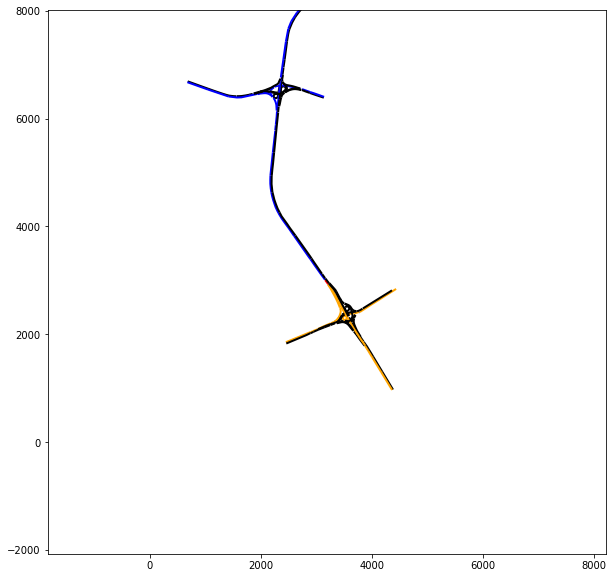

In [14]:
#net_path = '../experiment/Simulations/Base/traci_exp.net.xml'
net_path = '../motorway/Simulations/Base/network.net.xml'
net = sumolib.net.readNet(net_path)
plot_options = {'defaultColor': 'black',
                'defaultWidth': 2}
plot_options = DotDict(plot_options)
edge_colors = {incident_edge: 'red'}

for i in range(n_up):
    for id in upstream_edges_ids[i]:
        edge_colors[id] = 'orange'
        
for i in range(n_down):
    for id in downstream_edges_ids[i]:
        edge_colors[id] = 'blue'
        
fig, ax = plt.subplots(1, figsize=(10,10))
plotNet(net, edge_colors, {}, plot_options, i_edge_obj, ax, margin=5000)


In [33]:
edge_to_level_dict_num, upstream_edges, _, _= get_up_and_down_stream(i_edge_obj=i_edge_obj,
                                                n_up=40,
                                                n_down=40)  

In [34]:
edge_to_level_dict_num

{'22941416#1': -1,
 '4937552#1': -1,
 '22941416#0': -2,
 '4937552#1-AddedOnRampEdge': -2,
 '54121214': -3,
 '28458824': -3,
 '4937552#0': -3,
 '431199180': -4,
 '261583464': -4,
 '75259388-AddedOffRampEdge.122': -4,
 '22941414': -5,
 '26378010': -5,
 '75259388-AddedOffRampEdge.76': -5,
 '261187938-AddedOffRampEdge': -6,
 '457424511#3.414': -6,
 '75259388-AddedOffRampEdge.702': -6,
 '261187938': -7,
 '457424511#3': -7,
 '75259388-AddedOffRampEdge.381': -7,
 '293596618#1-AddedOffRampEdge': -8,
 '75259388-AddedOffRampEdge': -8,
 '360361373': 1,
 '360361373.463': 2,
 '360361373.981': 3,
 '360361373.1498': 4,
 '360361373.1899': 5,
 '360361373.2215': 6,
 '360361373.2643': 7,
 '360361373-AddedOffRampEdge': 8,
 '4414080#0': 9,
 '492226831': 10,
 '4414080#0.187': 10,
 '54121079': 11,
 '18702678': 11,
 '4414080#0.756': 11,
 '492226824': 12,
 '18702682': 12,
 '4414080#0.756.47': 12,
 '491989399#1-AddedOnRampEdge': 13,
 '18702680': 13,
 '4414080#1-AddedOnRampEdge': 13,
 '491989399#1-AddedOnRampEdg

In [35]:
incident_edge

'360361373-AddedOnRampEdge'

In [38]:
n_nodes = 147
network_relative_val = np.zeros(n_nodes)
for i in range(n_nodes):
    edge = ind_to_edge[i]
    if edge in edge_to_level_dict_num.keys():
        network_relative_val[i] = edge_to_level_dict_num[ind_to_edge[i]]
    else:
        network_relative_val[i] = 200

In [40]:
np.where(network_relative_val == 0)

(array([60]),)

## check edge level counterfactuals

In [14]:
results_incident = pd.read_csv(f'{experiment_path}/edgedata.csv', sep=';')
results_incident = results_incident[['edge_id', 'interval_begin', 'edge_density', 'edge_occupancy', 'edge_speed', 'edge_waitingTime', 'edge_timeLoss']]
results_incident_table = results_incident.pivot(index='edge_id', columns='interval_begin', values=['edge_speed','edge_density'])

counterfactual_incident = pd.read_csv(f'{experiment_path}/edgedata_counterfactual.csv', sep=';')
counterfactual_incident = counterfactual_incident[['edge_id', 'interval_begin', 'edge_density', 'edge_occupancy', 'edge_speed', 'edge_waitingTime', 'edge_timeLoss']]
counterfactual_incident_table = counterfactual_incident.pivot(index='edge_id', columns='interval_begin', values=['edge_speed','edge_density'])



In [15]:
results_incident

,edge_id,interval_begin,edge_density,edge_occupancy,edge_speed,edge_waitingTime,edge_timeLoss
0,106130759,36935.0,19.48,2.53,27.26,0.0,36.03
1,106130759-AddedOffRampEdge,36935.0,NaN,NaN,NaN,NaN,NaN
2,106130759.1186,36935.0,16.04,2.07,27.66,0.0,11.51
3,106130759.1630,36935.0,7.04,0.89,27.88,0.0,1.59
4,106130759.1868,36935.0,3.21,0.42,27.90,0.0,0.51
...,...,...,...,...,...,...,...
35275,gneE2,51275.0,45.18,5.56,25.84,0.0,21.46
35276,gneE3,51275.0,38.94,4.77,26.11,0.0,19.38
35277,gneE4,51275.0,37.38,4.59,26.26,0.0,18.32
35278,gneE6,51275.0,40.71,4.97,25.96,0.0,18.10


In [16]:
results_incident_table.iloc[0].loc['edge_speed'].index[1] - results_incident_table.iloc[0].loc['edge_speed'].index[0]

60.0

In [17]:
upstream_edges

['22941416#1',
 '4937552#1',
 '22941416#0',
 '4937552#1-AddedOnRampEdge',
 '54121214',
 '28458824',
 '4937552#0',
 '431199180',
 '261583464',
 '75259388-AddedOffRampEdge.122',
 '22941414',
 '26378010',
 '75259388-AddedOffRampEdge.76',
 '261187938-AddedOffRampEdge',
 '457424511#3.414',
 '75259388-AddedOffRampEdge.702',
 '261187938',
 '457424511#3',
 '75259388-AddedOffRampEdge.381',
 '360361373-AddedOnRampEdge']

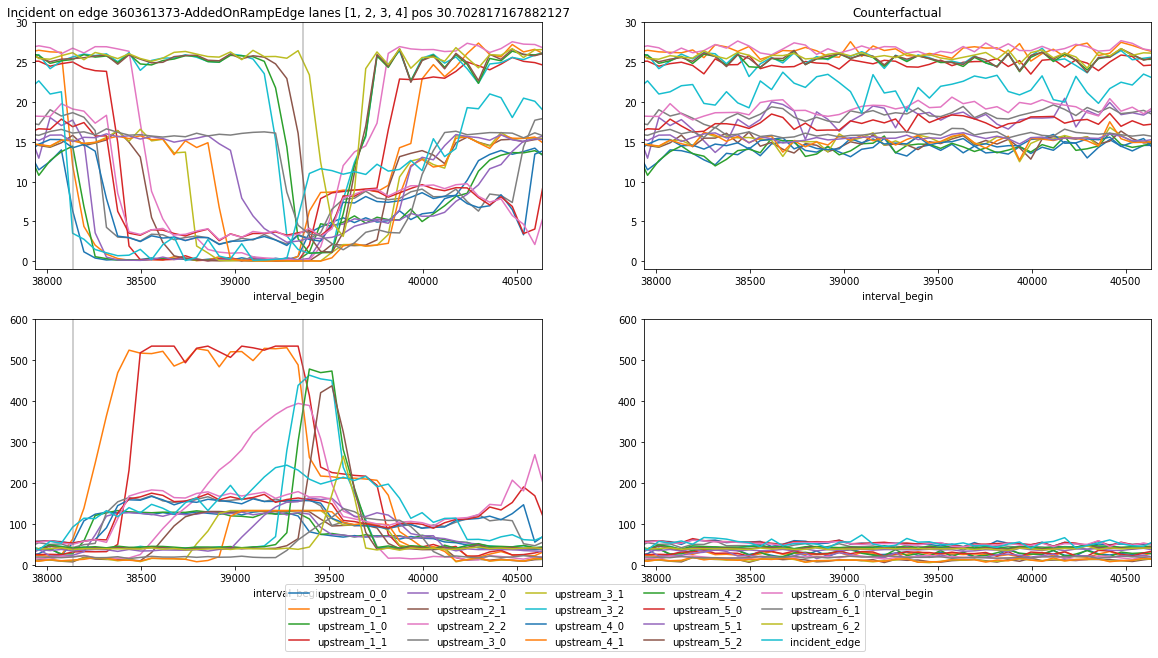

In [18]:
chosen_edges = upstream_edges
#chosen_edges = ['106130759']

fig, ax = plt.subplots(2,2)

results_incident_table.loc[chosen_edges].edge_speed.T.plot(figsize=(20,10), ax=ax[0,0], legend=False)
ax[0,0].set_title(f'Incident on edge {incident_settings["edge"]} lanes {incident_settings["lanes"]} pos {incident_settings["pos"]}')
results_incident_table.loc[chosen_edges].edge_density.T.plot(figsize=(20,10), ax=ax[1,0], legend=False)

counterfactual_incident_table.loc[chosen_edges].edge_speed.T.plot(figsize=(20,10), ax=ax[0,1], legend=False)
ax[0,1].set_title(f'Counterfactual')
counterfactual_incident_table.loc[chosen_edges].edge_density.T.plot(figsize=(20,10), ax=ax[1,1], legend=False)

ax[0,0].set_xlim(incident_settings['start_time'] - 200 ,incident_settings['start_time'] + 2500)
ax[1,0].set_xlim(incident_settings['start_time'] - 200 ,incident_settings['start_time'] + 2500)
ax[0,1].set_xlim(incident_settings['start_time'] - 200 ,incident_settings['start_time'] + 2500)
ax[1,1].set_xlim(incident_settings['start_time'] - 200 ,incident_settings['start_time'] + 2500)
ax[0,0].set_ylim(-1, 30)
ax[1,0].set_ylim(-1, 600)
ax[0,1].set_ylim(-1, 30)
ax[1,1].set_ylim(-1, 600)


ax[0,0].axvline(incident_settings['start_time'], color='grey', alpha=0.5)
ax[1,0].axvline(incident_settings['start_time'], color='grey', alpha=0.5)
ax[0,0].axvline(incident_settings['start_time'] + incident_settings['duration_time'], color='grey', alpha=0.5)
ax[1,0].axvline(incident_settings['start_time'] + incident_settings['duration_time'], color='grey', alpha=0.5)

handles, labels = ax[0,0].get_legend_handles_labels()
lgd = fig.legend(handles, [edge_to_level_dict[label] for label in labels], loc='lower center', bbox_to_anchor=(0.5, 0.0), ncol=5)
plt.savefig('fig1.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

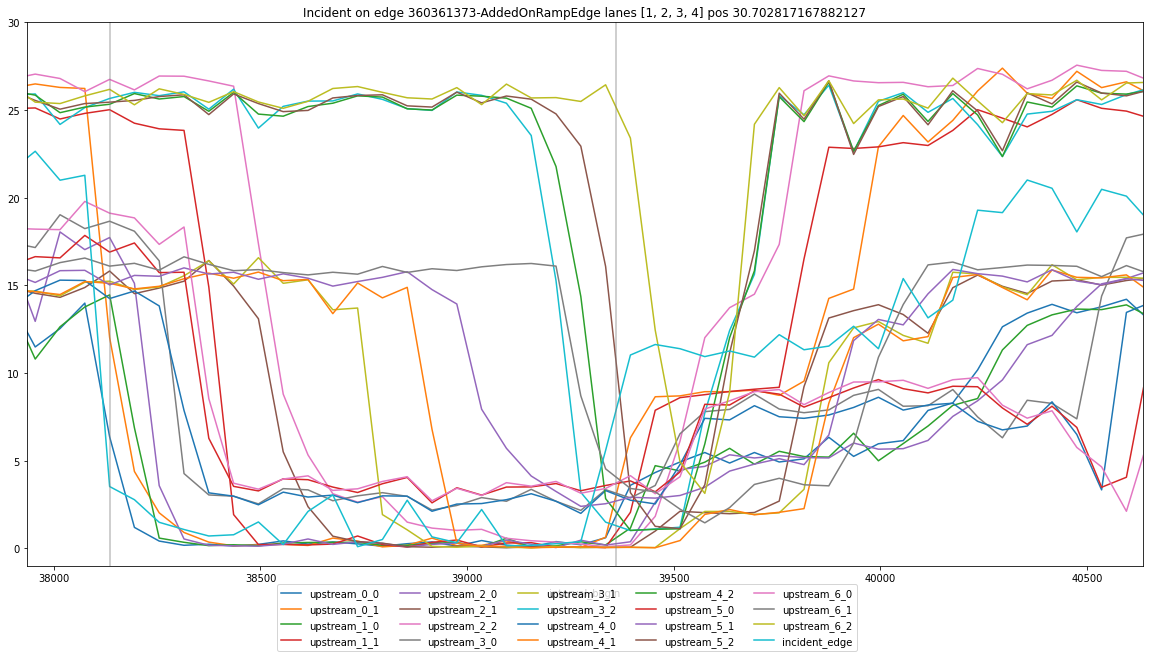

In [19]:
chosen_edges = upstream_edges


fig, ax = plt.subplots(1,1)

results_incident_table.loc[chosen_edges].edge_speed.T.plot(figsize=(20,10), ax=ax, legend=False)
ax.set_title(f'Incident on edge {incident_settings["edge"]} lanes {incident_settings["lanes"]} pos {incident_settings["pos"]}')

ax.set_xlim(incident_settings['start_time'] - 200 ,incident_settings['start_time'] + 2500)
ax.set_ylim(-1, 30)


ax.axvline(incident_settings['start_time'], color='grey', alpha=0.5)
ax.axvline(incident_settings['start_time'] + incident_settings['duration_time'], color='grey', alpha=0.5)

handles, labels = ax.get_legend_handles_labels()
lgd = fig.legend(handles, [edge_to_level_dict[label] for label in labels], loc='lower center', bbox_to_anchor=(0.5, 0.0), ncol=5)
plt.savefig('fig1.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

# Attempt at backlog

<AxesSubplot:xlabel='interval_begin'>

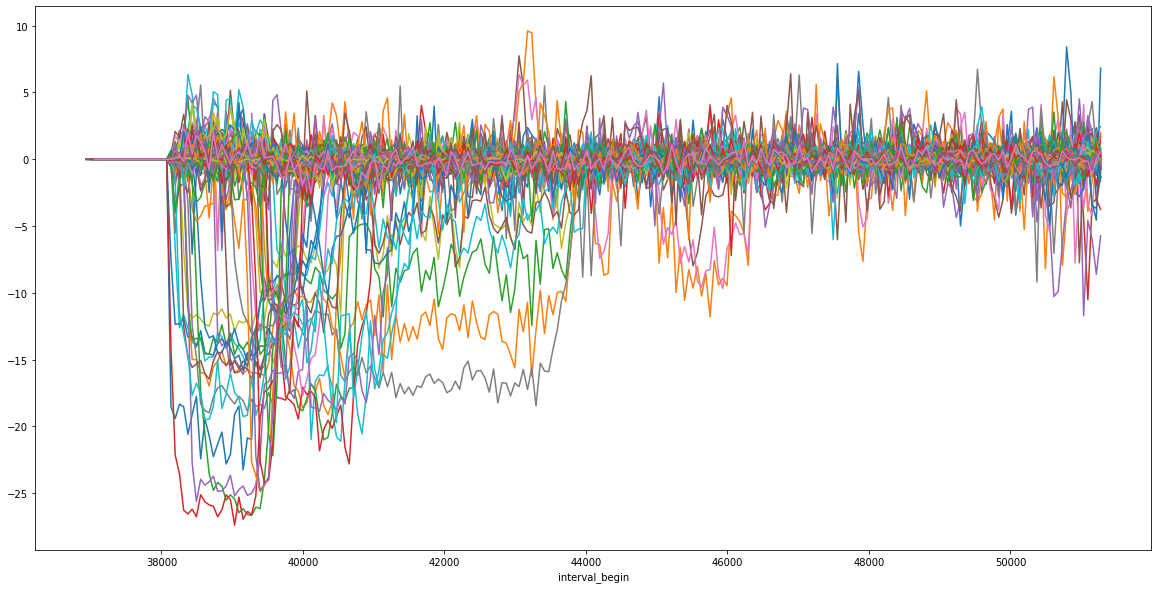

In [20]:
fig, ax = plt.subplots(1)
(results_incident_table.edge_speed - counterfactual_incident_table.edge_speed).T.plot(figsize=(20,10), legend=False, ax=ax)
#ax.set_xlim(incident_settings['start_time'] - 200 ,incident_settings['start_time'] + 5000)



In [21]:
edge_colors_2 = {}
for handle in handles:
        edge_colors_2[handle.get_label()] = handle.get_color()

<AxesSubplot:>

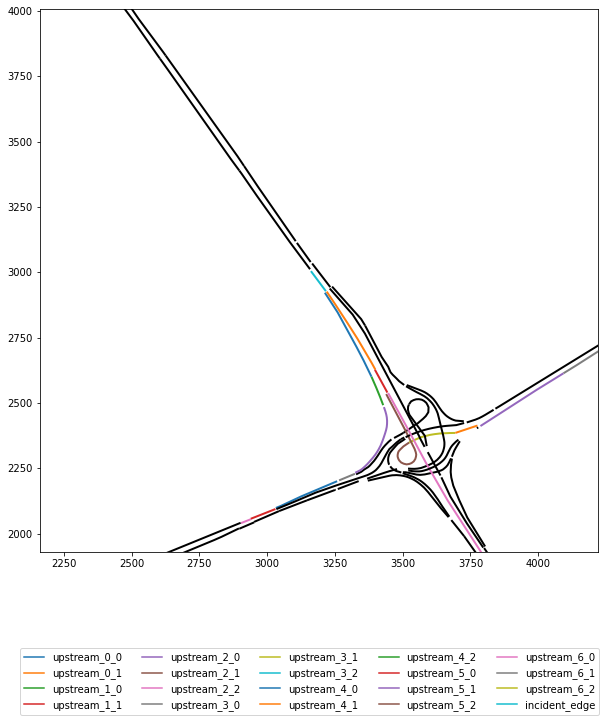

In [22]:
# 3 area = {'xmin':500 , 'xmax':3000 ,'ymin':4000 ,'ymax':8000 }
#area = {'xmin':2000 , 'xmax':2500 ,'ymin':5700 ,'ymax':6800 }
fig, ax = plt.subplots(1, figsize=(10,10))
#plotNet(net, edge_colors_2, {}, plot_options, i_edge_obj, ax, area=area)
fig.legend(handles, [edge_to_level_dict[label] for label in labels], loc='upper center', bbox_to_anchor=(0.5, -0.001), ncol=5)
plotNet(net, edge_colors_2, {}, plot_options, i_edge_obj, ax, margin=1000)

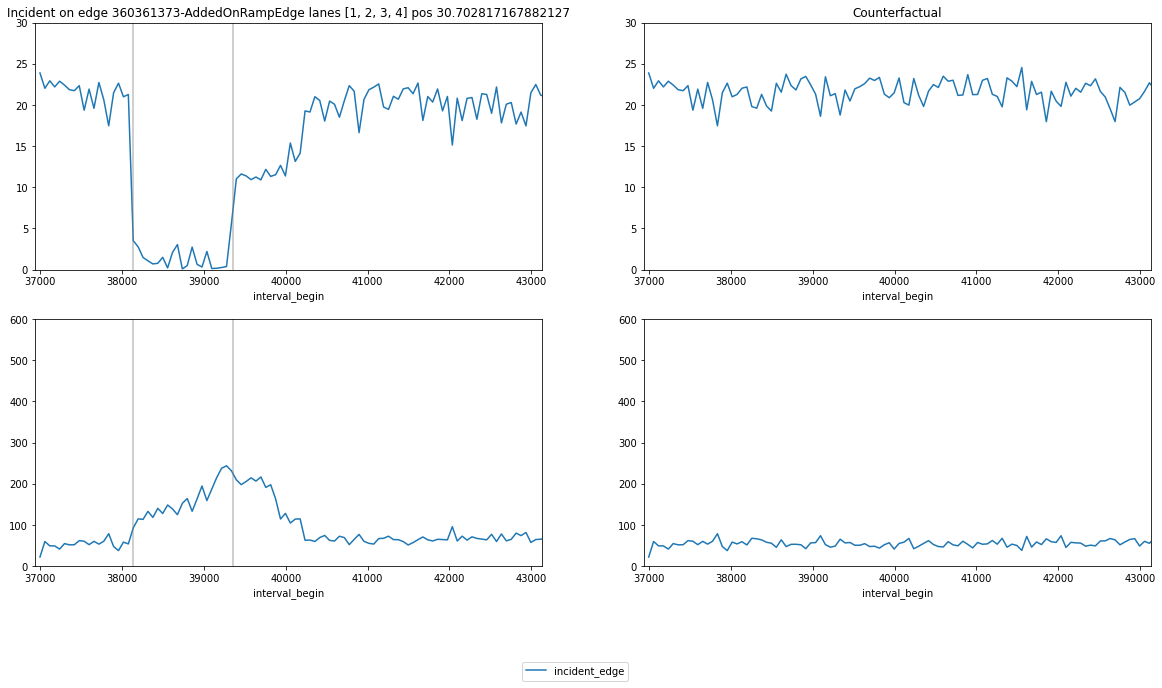

In [23]:
chosen_edges = incident_edge


fig, ax = plt.subplots(2,2)

results_incident_table.loc[chosen_edges].edge_speed.T.plot(figsize=(20,10), ax=ax[0,0], legend=False)
ax[0,0].set_title(f'Incident on edge {incident_settings["edge"]} lanes {incident_settings["lanes"]} pos {incident_settings["pos"]}')
results_incident_table.loc[chosen_edges].edge_density.T.plot(figsize=(20,10), ax=ax[1,0], legend=False)

counterfactual_incident_table.loc[chosen_edges].edge_speed.T.plot(figsize=(20,10), ax=ax[0,1], legend=False)
ax[0,1].set_title(f'Counterfactual')
counterfactual_incident_table.loc[chosen_edges].edge_density.T.plot(figsize=(20,10), ax=ax[1,1], legend=False)

ax[0,0].set_xlim(incident_settings['start_time'] - 1200 ,incident_settings['start_time'] + 5000)
ax[1,0].set_xlim(incident_settings['start_time'] - 1200 ,incident_settings['start_time'] + 5000)
ax[0,1].set_xlim(incident_settings['start_time'] - 1200 ,incident_settings['start_time'] + 5000)
ax[1,1].set_xlim(incident_settings['start_time'] - 1200 ,incident_settings['start_time'] + 5000)
ax[0,0].set_ylim(0, 30)
ax[1,0].set_ylim(0, 600)
ax[0,1].set_ylim(0, 30)
ax[1,1].set_ylim(0, 600)


ax[0,0].axvline(incident_settings['start_time'], color='grey', alpha=0.5)
ax[1,0].axvline(incident_settings['start_time'], color='grey', alpha=0.5)
ax[0,0].axvline(incident_settings['start_time'] + incident_settings['duration_time'], color='grey', alpha=0.5)
ax[1,0].axvline(incident_settings['start_time'] + incident_settings['duration_time'], color='grey', alpha=0.5)

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, [edge_to_level_dict[label] for label in labels], loc='upper center', bbox_to_anchor=(0.5, -0.001), ncol=5)

## Compare edge with detector data

In [24]:
results_detector = pd.read_csv(f'{experiment_path}/detectordata.csv', sep=';')
#results_detector = results_detector.replace(-1,np.nan)
results_detector_table = results_detector.pivot(index='interval_id', columns='interval_begin', values=['interval_flow',
                                                                                                       'interval_harmonicMeanSpeed',
                                                                                                       'interval_nVehContrib',
                                                                                                       'interval_speed'])
#results_detector_table = results_detector_table.groupby(results_detector_table.index.str.split('_').str[1]).mean().T

In [25]:





counterfactual_detector = pd.read_csv(f'{experiment_path}/detectordata_counterfactual.csv', sep=';')
counterfactual_detector = counterfactual_detector.replace(-1,np.nan)



#results_detector_table = results_detector_table.groupby(results_detector_table.index.str.split('_').str[1]).mean().T
#counterfactual_detector_table = counterfactual_detector_table.groupby(counterfactual_detector_table.index.str.split('_').str[1]).mean().T

### Create dataframe structure instead

In [23]:
inter_lim = 2
inci_df = pd.read_csv(f'{experiment_path}/detectordata.csv', sep=';')
inci_data, _ = transform_df_to_tensor(inci_df, interpolation_lim=inter_lim)

counter_df = pd.read_csv(f'{experiment_path}/detectordata_counterfactual.csv', sep=';')
counter_data, _ = transform_df_to_tensor(counter_df, interpolation_lim=inter_lim)

ind_to_edge, edge_to_ind = get_index_to_edge_dicts(inci_df)

In [27]:
# TODO SAVE THIS LANE MASK
lane_mask = ~(inci_data[...,2].mean(-1) == -1)

In [29]:
# Mask out lanes that are not used during normal traffic
unused_lanes_mask = ((counter_data[...,2].sum(2) > 0) & (counter_data[...,2].sum(2) < 300))
print(unused_lanes_mask.sum())
inci_data[unused_lanes_mask] = -2
counter_data[unused_lanes_mask] = -2

10


(0.0, 30.0)

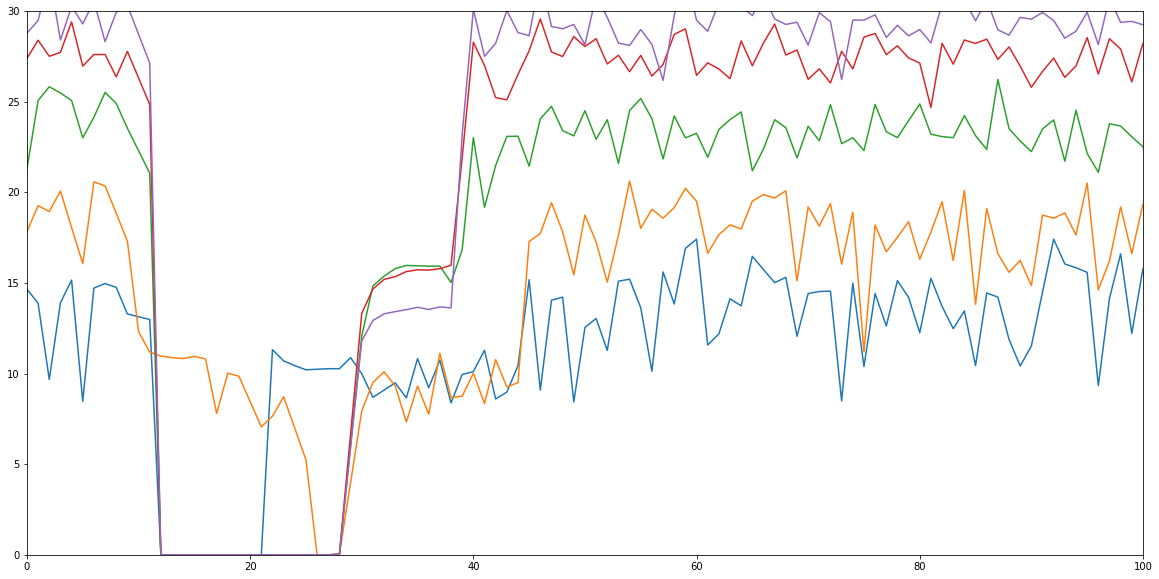

In [32]:
fig, ax = plt.subplots(1, figsize=(20,10))
ax.plot(inci_data[60, :, :, 1].T)
ax.set_xlim(0 , 100)
ax.set_ylim(0, 30)

(0.0, 30.0)

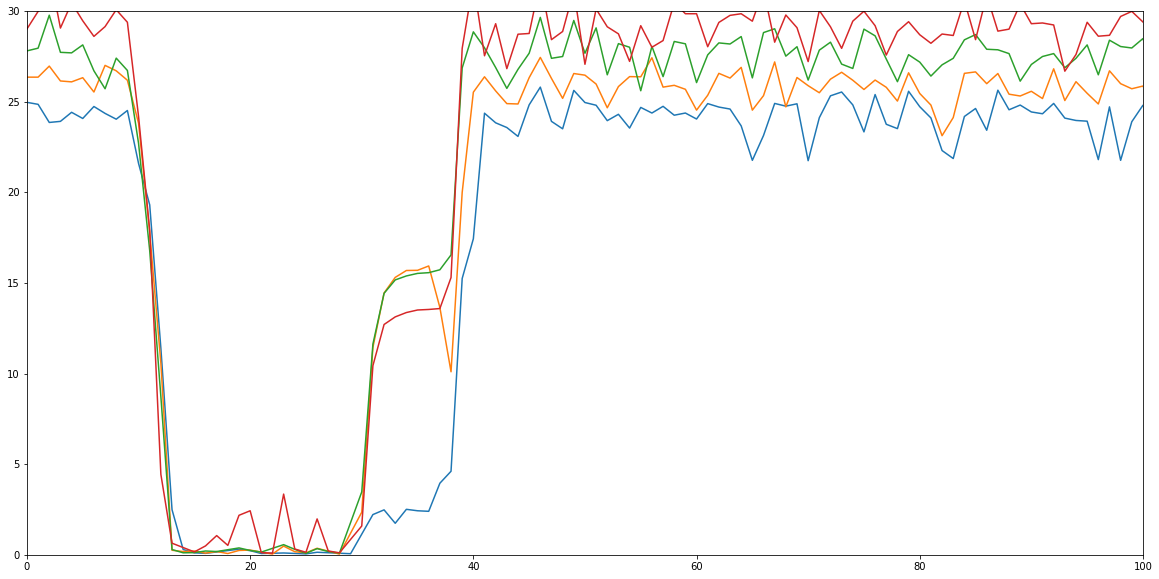

In [33]:
fig, ax = plt.subplots(1, figsize=(20,10))
ax.plot(inci_data[113, :, :, 1].T)
ax.set_xlim(0 , 100)
ax.set_ylim(0, 30)

In [34]:
residual_data = inci_data - counter_data[:, :, :,:]

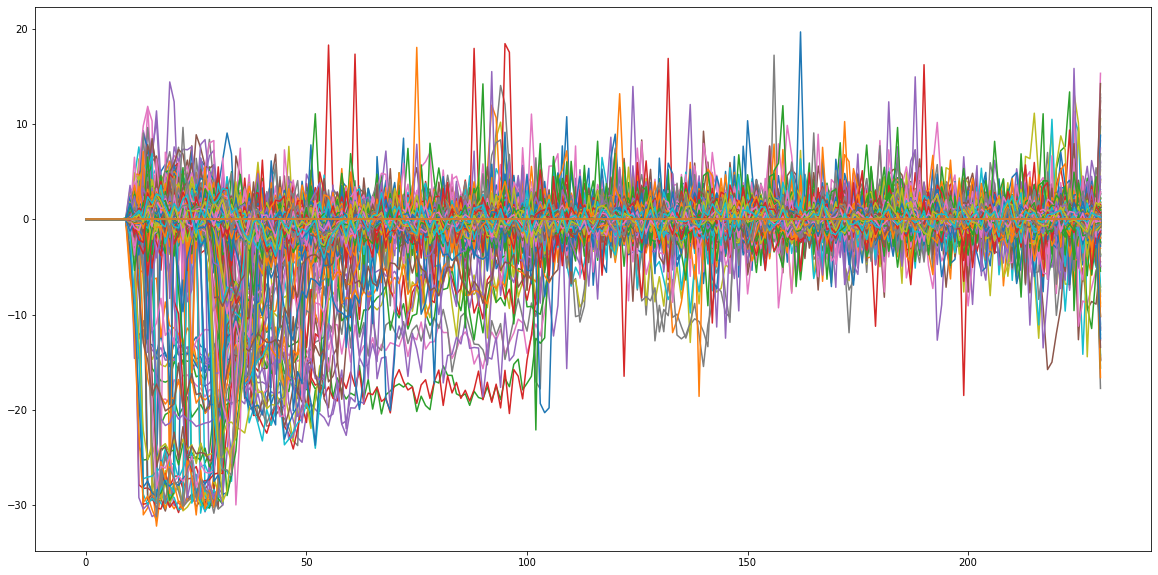

In [35]:
fig, ax = plt.subplots(1, figsize=(20,10))
_ = ax.plot(residual_data[:,:, : ,1].reshape(-1, 231).T)

In [36]:
residual_data.shape[1]

6

In [37]:
lane_stds = counter_data[...,1].std(2)

n_up = 20
n_down = 20

downstream_edges_ids = get_downstream_edges(i_edge_obj, n_down)
all_downstream_edges_ids = flatten(list(downstream_edges_ids.values()))

upstream_edges_ids = get_upstream_edges(i_edge_obj, n_up)
all_upstream_edges_ids = flatten(list(upstream_edges_ids.values()))

edge_to_level_dict = get_edge_to_level_dict(upstream_edges_ids, downstream_edges_ids, incident_edge)

relevant_edges = all_upstream_edges_ids + all_downstream_edges_ids + [incident_edge]
upstream_edges = all_upstream_edges_ids + [incident_edge]
downstream_edges = all_downstream_edges_ids + [incident_edge]

#edge_to_level_dict

In [38]:
upstream_look = [incident_edge] + all_upstream_edges_ids
upstream_look = [edge_to_ind[edge] for edge in upstream_look]
downstream_look = [incident_edge] + all_downstream_edges_ids
downstream_look = [edge_to_ind[edge] for edge in downstream_look]

In [ ]:
#fig, ax = plt.subplots(len(upstream_look), 6, figsize = (25,3*len(upstream_look)))
#for i, edge in enumerate(upstream_look):
#    for lane in range(residual_data.shape[1]):
#        ax[i,lane].plot(residual_data[edge,lane,:,2].T)
#        ax[i,lane].axhline(1.95 * lane_stds[edge,lane])
#        ax[i,lane].axhline(1.95 * -lane_stds[edge,lane])
#        ax[i,lane].set_ylim(-25,25)
#ax.plot(residual_data.reshape(-1, 471,3)[7, : ,2])
#ax.set_xlim(0,200)

In [ ]:
#fig, ax = plt.subplots(len(downstream_look), 6, figsize = (25,5*len(downstream_look)))
#for i, edge in enumerate(downstream_look):
#    for lane in range(residual_data.shape[1]):
#        ax[i,lane].plot(residual_data[edge,lane,:,2].T)
#        ax[i,lane].axhline(1.95 * lane_stds[edge,lane])
#        ax[i,lane].axhline(1.95 * -lane_stds[edge,lane])
#        ax[i,lane].set_ylim(-25,25)
#ax.plot(residual_data.reshape(-1, 471,3)[7, : ,2])
#ax.set_xlim(0,200)

In [39]:
def idxs_of_longest_seq(a1):
    # Pad False on both ends of array, find changes using np.diff, find idxs of changes
    idx_pairs = np.where(np.diff(np.hstack(([False],a1==1,[False]))))[0].reshape(-1,2)

    if len(idx_pairs) != 0:
        # Get the island lengths, whose argmax would give us the ID of longest island.
        # Start index of that island would be the desired output
        idxs_longest_seq = idx_pairs[np.diff(idx_pairs,axis=1).argmax()]
        length_seq = np.diff(idxs_longest_seq)[0]
    else:
        idxs_longest_seq = np.array([np.inf,-np.inf])
        length_seq = 0
    return idxs_longest_seq, length_seq


# Backlog based on counterfactual

In [45]:
length_lim = 10
std_lim = 1.95

# Get normal condition lane STD
lane_stds = counter_data[...,1].std(2)

# Only look at speed
residual_speed = residual_data[...,1]

# Bool of affected lane at time steps [E, L ,T]
affect_bool_arr = (residual_speed.transpose(2,0,1) < std_lim * -lane_stds)

# reshape for finding consecutive subsequences -> [E*L, T]
arr = affect_bool_arr.transpose(1,2,0).reshape(-1, 231)

# Find longest subsequences
longest_affect_idxs, longest_affect_lengths = zip(*[idxs_of_longest_seq(row) for row in arr])

# Reshape back
longest_affect_lengths = np.stack(longest_affect_lengths).reshape(147,6)
longest_affect_idxs = np.stack(longest_affect_idxs).reshape(147,6,2)

# Find edges where a lane has a subsequence longer than limit
affected_edges = (longest_affect_lengths > length_lim).any(axis=1)
edge_idxs = np.where(affected_edges)[0]
affected_edges.sum()


29

In [46]:
longest_affect_idxs[0]

array([[176., 178.],
       [ 16.,  18.],
       [162., 164.],
       [ 17.,  18.],
       [ inf, -inf],
       [ inf, -inf]])

In [47]:
n_up = 40
n_down = 40

full_ds_ids = get_downstream_edges(i_edge_obj, n_down)
full_ds_ids_flat = flatten(list(full_ds_ids.values()))

full_us_ids = get_upstream_edges(i_edge_obj, n_up)
full_us_ids_flat = flatten(list(full_us_ids.values()))

full_edge_to_level_dict = get_edge_to_level_dict(full_us_ids, full_ds_ids, incident_edge)

full_relevant_edges = full_ds_ids_flat + full_us_ids_flat + [incident_edge]
full_upstream_edges = full_us_ids_flat + [incident_edge]
full_downstream_edges = full_ds_ids_flat + [incident_edge]

full_us_idxs = [edge_to_ind[edge] for edge in   full_upstream_edges]
upstream_edges_arr = np.isin(np.arange(147), full_us_idxs)

affected_us_mask = (upstream_edges_arr * affected_edges)

upstream_edge_idxs = np.where(affected_us_mask)[0]

affected_us_mask.sum()
#full_edge_to_level_dict

18

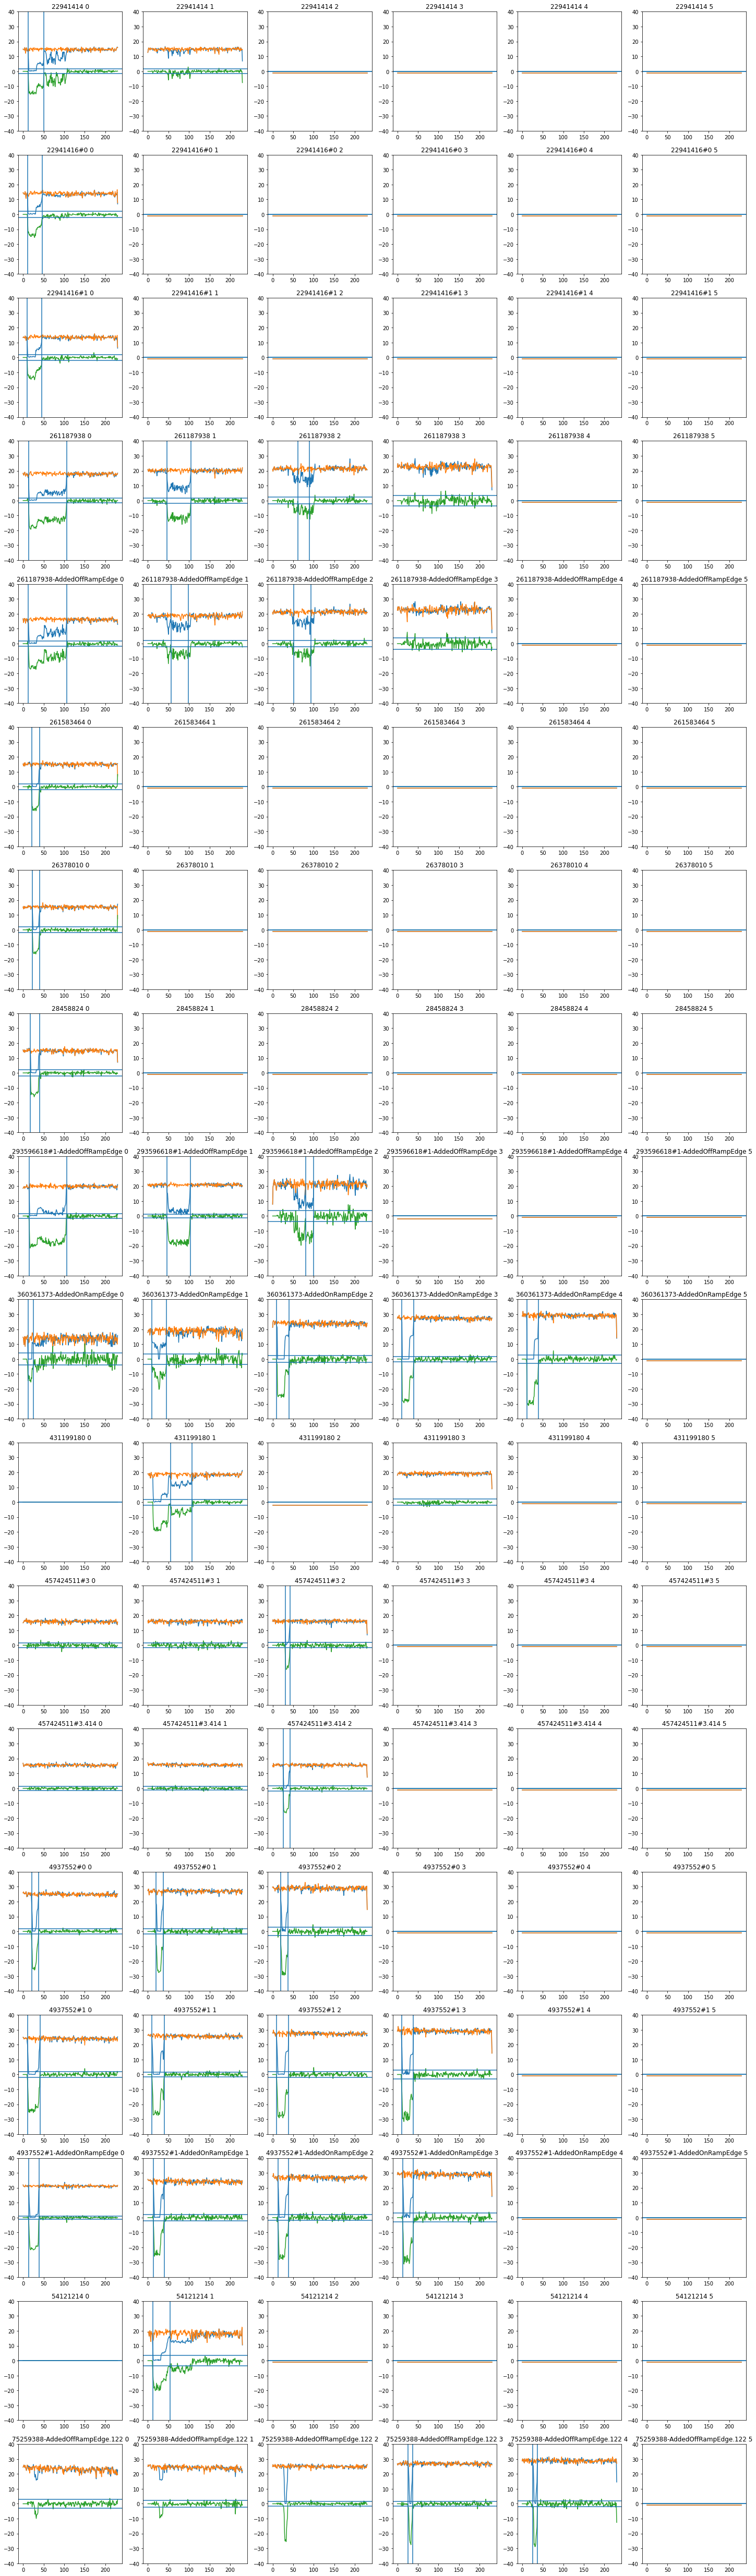

In [48]:
fig, ax = plt.subplots(len(upstream_edge_idxs), 6, figsize = (25,5*len(upstream_edge_idxs)))
for i, edge in enumerate(upstream_edge_idxs):
    for lane in range(residual_data.shape[1]):
        ax[i,lane].plot(inci_data[edge,lane,:,1].T)
        ax[i,lane].plot(counter_data[edge,lane,:,1].T)
        ax[i,lane].plot(residual_data[edge,lane,:,1].T)
        ax[i,lane].axhline(std_lim * lane_stds[edge,lane])
        ax[i,lane].axhline(std_lim * -lane_stds[edge,lane])
        if longest_affect_lengths[edge, lane] > length_lim:
            ax[i,lane].axvline(longest_affect_idxs[edge,lane, 0])
            ax[i,lane].axvline(longest_affect_idxs[edge,lane, 1])
        
        ax[i,lane].set_ylim(-40, 40)
        ax[i,lane].set_title(f'{ind_to_edge[edge]} {lane}')
#ax.plot(residual_data.reshape(-1, 471,3)[7, : ,2])
#ax.set_xlim(0,200)

In [ ]:
plot_options = {'defaultColor': 'black',
                'defaultWidth': 2}
plot_options = DotDict(plot_options)
edge_colors = {incident_edge: 'red'}

for idx in upstream_edge_idxs:
        edge_colors[ind_to_edge[idx]] = 'orange'

edge_colors[incident_edge] = 'red'        

fig, ax = plt.subplots(1, figsize=(10,10))
area = {'xmin':1500 , 'xmax':4750 ,'ymin':500 ,'ymax':7000 }
plotNet(net, edge_colors, {}, plot_options, i_edge_obj, ax, area=area)



In [ ]:
length_lim_2 = 1
std_lim_2 = 0.5

# Bool of affected lane at time steps [E, L ,T]
affect_bool_arr_2 = (residual_speed.transpose(2,0,1) < std_lim_2 * -lane_stds)

# reshape for finding consecutive subsequences -> [E*L, T]
arr_2 = affect_bool_arr_2.transpose(1,2,0).reshape(-1, 231)

# Find longest subsequences
longest_affect_idxs_2, longest_affect_lengths_2 = zip(*[idxs_of_longest_seq(row) for row in arr_2])

# Reshape back
longest_affect_lengths_2 = np.stack(longest_affect_lengths_2).reshape(147,6)
longest_affect_idxs_2 = np.stack(longest_affect_idxs_2).reshape(147,6,2)

# Find edges where a lane has a subsequence longer than limit
affected_edges_2 = (longest_affect_lengths_2 > length_lim).any(axis=1)
edge_idxs_2 = np.where(affected_edges_2)[0]
affected_edges_2.sum()


In [ ]:
cong_start_idxs = longest_affect_idxs_2[...,0]
cong_end_idxs = longest_affect_idxs_2[...,1]

In [ ]:
cong_start_idxs[(longest_affect_lengths < length_lim)] = np.inf
cong_end_idxs[(longest_affect_lengths < length_lim)] = -np.inf

In [ ]:
cong_start_time = cong_start_idxs.min(1)
cong_start_time[~affected_us_mask] = 0
cong_start_time

In [ ]:
cong_end_time = cong_end_idxs.max(1)
cong_end_time[~affected_us_mask] = 0
cong_end_time

In [ ]:
cong_start_time[86]

In [ ]:
cong_end_time[86]

In [ ]:
longest_affect_idxs[86]

In [ ]:
longest_affect_idxs.shape

In [ ]:
longest_affect_idxs[(longest_affect_lengths > length_lim)].shape

In [ ]:
edge_to_ind['457424511#3']

In [ ]:
fig, ax = plt.subplots(len(upstream_edge_idxs), 6, figsize = (25,5*len(upstream_edge_idxs)))
for i, edge in enumerate(upstream_edge_idxs):
    for lane in range(residual_data.shape[1]):
        ax[i,lane].plot(inci_data[edge,lane,:,2].T)
        ax[i,lane].plot(counter_data[edge,lane,:,2].T)
        ax[i,lane].plot(residual_data[edge,lane,:,2].T)
        ax[i,lane].axhline(std_lim * lane_stds[edge,lane])
        ax[i,lane].axhline(std_lim * -lane_stds[edge,lane])
        if longest_affect_lengths[edge, lane] > length_lim:
            ax[i,lane].axvline(longest_affect_idxs[edge,lane, 0], color='blue')
            ax[i,lane].axvline(longest_affect_idxs[edge,lane, 1], color='blue')
            ax[i,lane].axvline(cong_start_time[edge], color = 'green')
            ax[i,lane].axvline(cong_end_time[edge], color = 'green')
        
        ax[i,lane].set_ylim(-40, 40)
        ax[i,lane].set_title(f'{ind_to_edge[edge]} {lane}')
#ax.plot(residual_data.reshape(-1, 471,3)[7, : ,2])
#ax.set_xlim(0,200)

In [ ]:
upstream_edge_idxs

In [ ]:
residual_data.shape

In [ ]:
residual_speed.max()

In [ ]:
delta_speeds = np.zeros((147))
for edge in upstream_edge_idxs:
    start_time = int(cong_start_time[edge])
    end_time = int(cong_end_time[edge])
    #counter_mean_speed = counter_data[edge, lane_mask[edge], start_time:end_time, 2].mean(-1)
    #inci_mean_speed = inci_data[edge, lane_mask[edge], start_time:end_time, 2].mean(-1)
    #delta_speeds[edge, lane_mask[edge]] = counter_mean_speed - inci_mean_speed
    delta_speeds[edge] = residual_speed[edge, lane_mask[edge], start_time:end_time].min()
    

In [ ]:
fig, ax = plt.subplots(len(upstream_edge_idxs), 6, figsize = (25,5*len(upstream_edge_idxs)))
for i, edge in enumerate(upstream_edge_idxs):
    for lane in range(residual_data.shape[1]):
        if lane_mask[edge, lane]:
            ax[i,lane].plot(inci_data[edge,lane,:,2].T)
            ax[i,lane].plot(counter_data[edge,lane,:,2].T)
            ax[i,lane].plot(residual_data[edge,lane,:,2].T)
            ax[i,lane].axhline(std_lim * lane_stds[edge,lane])
            ax[i,lane].axhline(std_lim * -lane_stds[edge,lane])
            if delta_speeds[edge] != 0:
                ax[i,lane].axhline(delta_speeds[edge], color = 'red')
            if longest_affect_lengths[edge, lane] > length_lim:
                ax[i,lane].axvline(longest_affect_idxs[edge,lane, 0], color='blue')
                ax[i,lane].axvline(longest_affect_idxs[edge,lane, 1], color='blue')
                ax[i,lane].axvline(cong_start_time[edge], color = 'green')
                ax[i,lane].axvline(cong_end_time[edge], color = 'green')

            ax[i,lane].set_ylim(-40, 40)
            ax[i,lane].set_title(f'{ind_to_edge[edge]} {lane}')
#ax.plot(residual_data.reshape(-1, 471,3)[7, : ,2])
#ax.set_xlim(0,200)

# Create dataset from simulation

## How to create sequences from simulation

- Do we even do sequence to sequence?
- Do we make multiple sequences from each simulation or is each simulation separate?
- Should the incident happen the same time along the sequence for all of the simulations?
- Should sequences be the same length?
    - If we do backlog then no they should vary in length
    
## Create backlog from comparing incident with counterfactual

- Should it even be created looking at the counterfactual?
- How big a difference is necessary?
    -- Could be based on the LoS from the highway manual
- If this is model output how do we get a model to output it?
    - Some sequence model with a way to determine how to stop
        - This sounds like some NLP like problem